Import libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style
mpl.style.use('seaborn-bright')
import numpy as np
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact, fixed
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from mpl_toolkits.mplot3d import axes3d    

%matplotlib inline

Define a function to plot the decision boundaries

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors = 'k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Create an arbitrary dataset and make a scatter plot

Copying file://test1.svg [Content-Type=image/svg+xml]...
/ [1 files][ 35.9 KiB/ 35.9 KiB]                                                
Operation completed over 1 objects/35.9 KiB.                                     


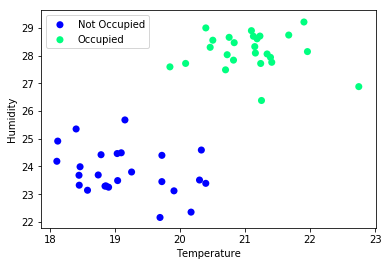

In [16]:
X, y = make_blobs(n_samples=50, centers= [(19, 24), (21, 28)], center_box = (-10, 10),
                  random_state=1, cluster_std=0.8)
d = {'Temperature' : X[:, 0], 'Humidity' : X[:, 1], 'Occupancy' : y}
df = pd.DataFrame(d,columns=['Temperature','Humidity', 'Occupancy'])
df['Label'] = np.where(df['Occupancy'] == 1, 'Occupied', 'Not Occupied')
label = [0,1]
colors = [plt.cm.winter(float(i)/max(label)) for i in label]
j = 0
for i, cluster in df.groupby('Label'):
    plt.scatter(cluster['Temperature'], cluster['Humidity'], c=colors[j], label = i, s = 50, edgecolor='none')
    j = j + 1
plt.legend(loc = 'best')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.savefig("test1.svg", format="svg")
!gsutil cp 'test1.svg' 'gs://omina-test-set/occupancy-data/fig1.svg'

Train linear SVM model and plot

Copying file://test2.svg [Content-Type=image/svg+xml]...
/ [1 files][ 40.7 KiB/ 40.7 KiB]                                                
Operation completed over 1 objects/40.7 KiB.                                     


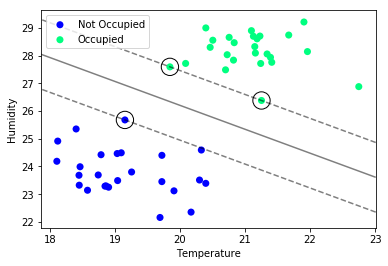

In [17]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
j = 0
for i, cluster in df.groupby('Label'):
    plt.scatter(cluster['Temperature'], cluster['Humidity'], c=colors[j], label=i, s = 50, edgecolor='none')
    j = j + 1
plt.legend(loc = 'best')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plot_svc_decision_function(model, plot_support=True);
plt.savefig("test2.svg", format="svg")
!gsutil cp 'test2.svg' 'gs://omina-test-set/occupancy-data/fig2.svg'


Create another arbitrary dataset

Copying file://test6.svg [Content-Type=image/svg+xml]...
/ [1 files][ 36.3 KiB/ 36.3 KiB]                                                
Operation completed over 1 objects/36.3 KiB.                                     


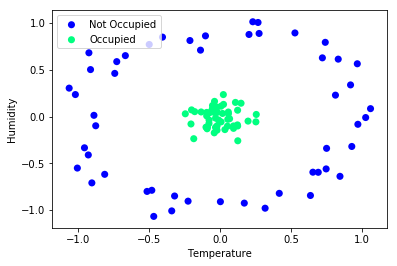

In [18]:
X, y = make_circles(factor=0.1, random_state=1, noise=0.1)
d = {'Temperature' : X[:, 0], 'Humidity' : X[:, 1], 'Occupancy' : y}
df = pd.DataFrame(d,columns=['Temperature','Humidity', 'Occupancy'])
df['Label'] = np.where(df['Occupancy'] == 1, 'Occupied', 'Not Occupied')
label = [0,1]
colors = [plt.cm.winter(float(i)/max(label)) for i in label]
j = 0
for i, cluster in df.groupby('Label'):
    plt.scatter(cluster['Temperature'], cluster['Humidity'], c=colors[j], label=i, s = 50, edgecolor='none')
    j = j+1
plt.legend(loc = 'best')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.savefig("test6.svg", format="svg")
!gsutil cp 'test6.svg' 'gs://omina-test-set/occupancy-data/fig6.svg'

Fit a linear SVM, and plot the decision boundary

Copying file://test3.svg [Content-Type=image/svg+xml]...
/ [1 files][ 37.5 KiB/ 37.5 KiB]                                                
Operation completed over 1 objects/37.5 KiB.                                     


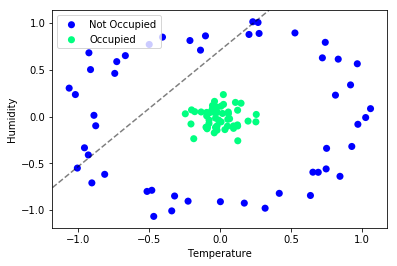

In [19]:
clf = SVC(kernel='linear').fit(X, y)
j = 0
for i, cluster in df.groupby('Label'):
    plt.scatter(cluster['Temperature'], cluster['Humidity'], c=colors[j], label=i, s = 50, edgecolor='none')
    j = j+1
plt.legend(loc = 'best')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plot_svc_decision_function(clf, plot_support=False);
plt.savefig("test3.svg", format="svg")
!gsutil cp 'test3.svg' 'gs://omina-test-set/occupancy-data/fig3.svg'

Increase the dimention of a dataset

In [20]:
r = np.exp(-(X ** 2).sum(1))
df['r'] = r

PLot and see if now the clusters are linearly separable

Copying file://test4.svg [Content-Type=image/svg+xml]...
/ [1 files][ 48.1 KiB/ 48.1 KiB]                                                
Operation completed over 1 objects/48.1 KiB.                                     


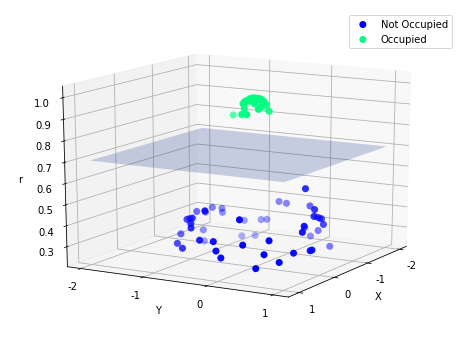

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
z = np.array([[0.7, 0.7, 0.7, 0.7],
              [0.7, 0.7, 0.7, 0.7],
              [0.7, 0.7, 0.7, 0.7],
              [0.7, 0.7, 0.7, 0.7]])
j = 0
for i, cluster in df.groupby('Label'):
    ax.scatter(cluster['Temperature'], cluster['Humidity'], cluster['r'], c=colors[j], label=i, s = 50, edgecolor='none')
    j = j+1
plt.legend(loc = 'best')
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.view_init(15, 30)
ax.set_xticks([-2, -1, 0, 1])
ax.set_yticks([-2, -1, 0, 1])
ax.set_xticklabels([-2, -1, 0, 1])
ax.set_yticklabels([-2, -1, 0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('r')
plt.savefig("test4.svg", format="svg")
!gsutil cp 'test4.svg' 'gs://omina-test-set/occupancy-data/fig4.svg'

Apply rbf kernel with SVM

Copying file://test5.svg [Content-Type=image/svg+xml]...
/ [1 files][ 42.6 KiB/ 42.6 KiB]                                                
Operation completed over 1 objects/42.6 KiB.                                     


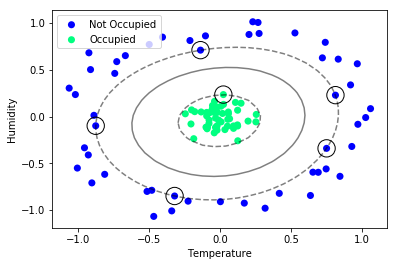

In [22]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
j = 0
for i, cluster in df.groupby('Label'):
    plt.scatter(cluster['Temperature'], cluster['Humidity'], c=colors[j], label=i, s = 50, edgecolor='none')
    j = j + 1
plt.legend(loc = 'best')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');
plt.savefig("test5.svg", format="svg")
!gsutil cp 'test5.svg' 'gs://omina-test-set/occupancy-data/fig5.svg'
plt.show()

In [23]:
X, y = make_blobs(n_samples=100, centers= [(19, 24), (21, 28)], center_box = (-10, 10),
                  random_state=1, cluster_std=1.5)
d = {'Temperature' : X[:, 0], 'Humidity' : X[:, 1], 'Occupancy' : y}
df = pd.DataFrame(d,columns=['Temperature','Humidity', 'Occupancy'])
df['Label'] = np.where(df['Occupancy'] == 1, 'Occupied', 'Not Occupied')

Copying file://DT.svg [Content-Type=image/svg+xml]...
/ [1 files][ 92.1 KiB/ 92.1 KiB]                                                
Operation completed over 1 objects/92.1 KiB.                                     


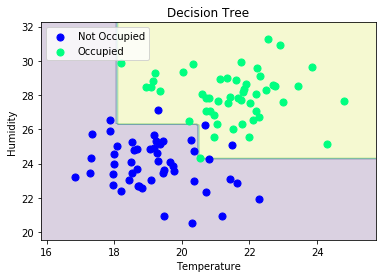

In [24]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(df.iloc[:, :2], y)

# Plotting decision regions
x_min, x_max = df.iloc[:, 0].min() - 1, df.iloc[:, 0].max() + 1
y_min, y_max = df.iloc[:, 1].min() - 1, df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
#mpl.style.use('seaborn-bright')
f, fig = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(6, 4))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig.contourf(xx, yy, Z, alpha=0.2)
label = [0,1]
colors = [plt.cm.winter(float(i)/max(label)) for i in label]
j = 0
for i, cluster in df.groupby('Label'):
    fig.scatter(cluster['Temperature'], cluster['Humidity'], c=colors[j], label=i, s = 50)
    j = j +1
fig.legend(loc = 'best')

#fig.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,
#              s=50, edgecolor='none',cmap='winter')

fig.set_title('Decision Tree')
plt.xlabel('Temperature')
plt.ylabel('Humidity')

plt.savefig("DT.svg", format="svg")
!gsutil cp 'DT.svg' 'gs://omina-test-set/occupancy-data/figDT.svg'
plt.show()

In [25]:
plt.rcParams.update(plt.rcParamsDefault)